In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn, datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv", nrows = 1000000)
train.shape  #(1000000, 8)


(1000000, 8)

In [42]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [43]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [4]:
#check for missing values in train data
train.isnull().sum().sort_values(ascending=False)  #dropoff_longitude/latitude(10)

dropoff_longitude    10
dropoff_latitude     10
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
passenger_count       0
dtype: int64

In [5]:
#drop the missing values
train = train.drop(train[train.isnull().any(1)].index, axis = 0) 

In [10]:
# What is the distribution of fare amount?
#38 fields have negative fare_amount values.
from collections import Counter
print(Counter(train['fare_amount']<0))  #Counter({False: 999952, True: 38})
train = train.drop(train[train['fare_amount']<0].index, axis=0)
print(train['fare_amount'].describe())  #no more negative values in the fare field

Counter({False: 999952})


Text(0.5, 1.0, 'Distribution of fare amount')

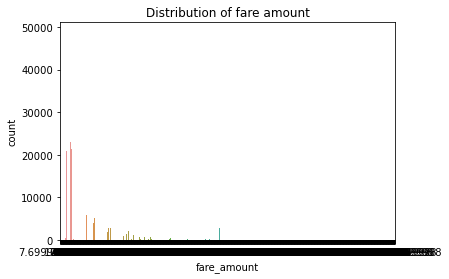

In [7]:
ax= sns.countplot(x= train.fare_amount)
plt.title("Distribution of fare amount")  #have some outliers that affect the distribution. 

In [8]:
fare_founded= round(train.fare_amount/0.5)*0.5
fare_founded

0          4.5
1         17.0
2          5.5
3          7.5
4          5.5
          ... 
999995     7.0
999996     7.5
999997    10.5
999998     7.0
999999     4.0
Name: fare_amount, Length: 999952, dtype: float64

Text(0.5, 1.0, 'Distribution of fare amount')

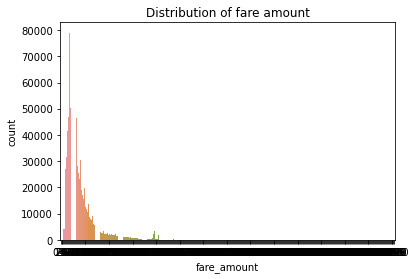

In [9]:
ax= sns.countplot(x= fare_founded)
plt.title("Distribution of fare amount")

In [48]:
# What is the distribution of number of passengers per trip?
train['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [9]:
#max is 208 passengers. Assuming that a bus is a 'taxi' in NYC, I don't think a bus can carry 208 passengers! Let' see the distribution of this field; 7-1 SUV or a bus
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [10]:
train = train.drop(train[train['passenger_count']==208].index, axis = 0)

In [11]:
#Max number of passengers are 6. Which makes sense is the cab is an SUV
train['passenger_count'].describe()

count    999951.000000
mean          1.684736
std           1.307733
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [52]:
#Next, let us explore the pickup latitude and longitudes
train['pickup_latitude'].describe()

count    999951.000000
mean         39.929090
std           7.626025
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

In [99]:
# Latitudes range from -90 to 90.
# Longitudes range from -180 to 180.


Text(0.5, 1.0, 'Distribution of fare amount')

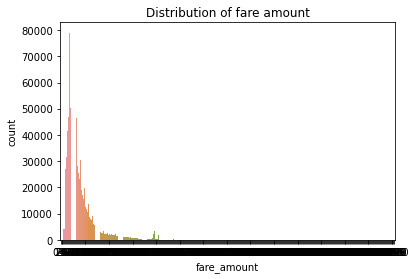

In [14]:
ax= sns.countplot(x= fare_founded)
plt.title("Distribution of fare amount")

Text(0, 0.5, 'Fare')

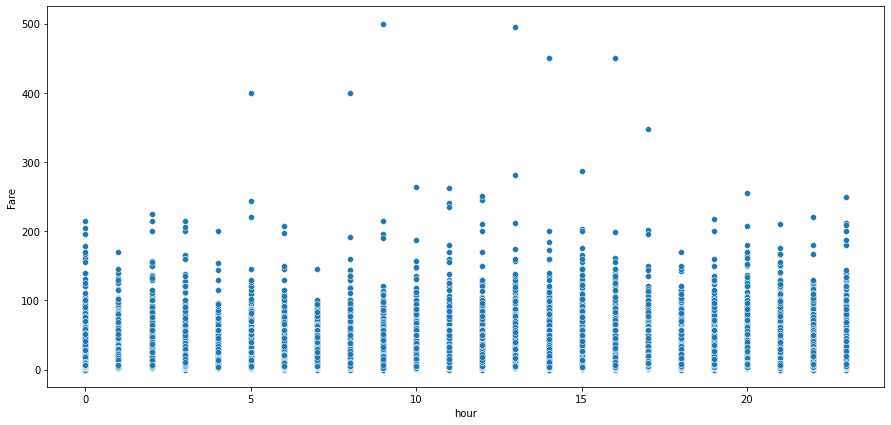

In [100]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = train["pickup_hour"], y = train["fare_amount"])
plt.xlabel('hour')
plt.ylabel('Fare')

In [21]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

df_outlier_removed=remove_outlier_IQR(train.fare_amount)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=train.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    train_final=train.drop([ind_diff[i]])
    df=train_final

len(ind_diff)

KeyboardInterrupt: 

In [95]:
train[train['pickup_latitude'] < -90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_hour,longitude_rounded,latitude_rounded


In [92]:
train[train['pickup_latitude'] > 90].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_hour,longitude_rounded,latitude_rounded


In [96]:
train = train.drop(train[train['pickup_latitude'] > 90].index, axis =0) 
train = train.drop(train[train['pickup_latitude'] < -90].index, axis =0)
train.shape

(999940, 13)

In [97]:
#Next, let us explore the pickup latitude and longitudes
train['pickup_longitude'].describe()

count    9.999400e+05
mean    -7.243524e+01
std      1.356143e-09
min     -7.243524e+01
25%     -7.243524e+01
50%     -7.243524e+01
75%     -7.243524e+01
max     -7.243524e+01
Name: pickup_longitude, dtype: float64

In [98]:
train["longitude_diff"] = train["dropoff_longitude"] - train["pickup_longitude"]
train["latitude_diff"] = train["dropoff_latitude"] - train["pickup_latitude"]
# train = train.drop(columns = ["key"])

In [56]:
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [23]:
# key and pickup time to datetime
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])


In [68]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_hour,longitude_rounded,latitude_rounded
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,Monday,6,17,-72.435242,41.0
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,Tuesday,1,16,-72.435242,41.0
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,Thursday,8,0,-72.435242,41.0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,Saturday,4,4,-72.435242,41.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,Tuesday,3,7,-72.435242,41.0


In [27]:
# Extract Day and date
train['pickup_day']=train['pickup_datetime'].dt.day_name()
train['pickup_month'] = pd.DatetimeIndex(train['pickup_datetime']).month

In [28]:
train['pickup_hour'] = pd.DatetimeIndex(train['pickup_datetime']).hour

Text(0.5, 1.0, 'Distribution of pickup hour')

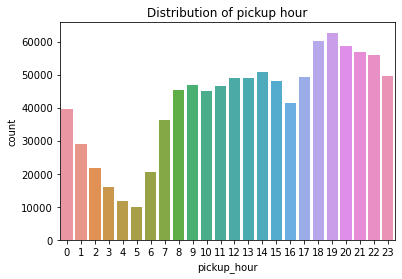

In [31]:
# What are top 5 busiest hours of the day?
ax= sns.countplot(x= train['pickup_hour'])
plt.title("Distribution of pickup hour")

In [76]:
train["pickup_hour"].value_counts().head()   # Pickup hours - 19 to 22 -due to office log out, shifts 

19    62661
18    60264
20    58763
21    56938
22    55795
Name: pickup_hour, dtype: int64

In [77]:
train["pickup_day"].value_counts().head()

Friday       154238
Saturday     151273
Thursday     149661
Wednesday    144835
Tuesday      139980
Name: pickup_day, dtype: int64

In [78]:
train["pickup_month"].value_counts().head()

5    93625
3    93440
4    92226
6    89837
1    89014
Name: pickup_month, dtype: int64

Insights
1. Friday heading the count as its weekend starting and passenger plan for Party/Trips/Travel then follow up by saturday.
2. Maximum passenger count =1; people travel solo
3. Pickup hours - 19 to 22 -due to office log out, shifts 


Text(0.5, 1.0, 'Distribution of passenger Count')

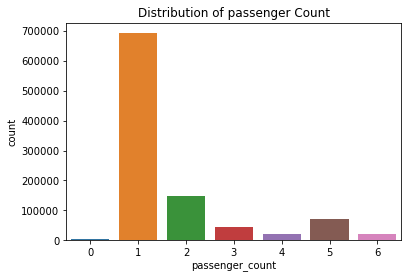

In [65]:
ax= sns.countplot(x= train.passenger_count)
plt.title("Distribution of passenger Count")

In [75]:
# round(train.pickup_longitude,0)
train.pickup_longitude.value_counts()

-72.435242    999952
Name: pickup_longitude, dtype: int64

In [79]:
# What are the top 10 busiest locations of the city?
# NYC Longitude = -73.935242, Latitude = 40.730610
# when looking at the map, +/- 2 is a large distance that covers a huge area
longitude_upper = -73.935242 + 2
longitude_lower = -73.935242 - 2
latitude_upper = 40.730610 + 2
latitude_lower = 40.730610 - 2

train['longitude_rounded']= round(train.pickup_longitude,0)
train['latitude_rounded'] = round(train. pickup_latitude,0)

# filter(train['pickup_longitude'] in range(longitude_lower, longitude_upper) | train['pickup_latitude'] in range(latitude_lower, latitude_upper))

TypeError: 'float' object cannot be interpreted as an integer

1. In what trips can you confidently use respective means as measures of central tendency to estimate fare, time taken, etc. : not sure
2. Can we build a model to predict fare and tip amount given pick up and drop off coordinates, time of day and week?
- based on columns - driver will be aware about the tip and fare
fare_amount ,tip_amount, pickup_datetime, pickup_longitude, pickup_latitude

In [82]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_hour,longitude_rounded,latitude_rounded
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-72.435242,40.721319,-73.841610,40.712278,1,Monday,6,17,-72.0,41.0
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-72.435242,40.711303,-73.979268,40.782004,1,Tuesday,1,16,-72.0,41.0
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-72.435242,40.761270,-73.991242,40.750562,2,Thursday,8,0,-72.0,41.0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-72.435242,40.733143,-73.991567,40.758092,1,Saturday,4,4,-72.0,41.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-72.435242,40.768008,-73.956655,40.783762,1,Tuesday,3,7,-72.0,41.0


In [104]:
# get the distance
def haversine_distance(lat1, long1, lat2, long2):
    # data=[train,test]
    # for i in train:
    R = 6371  #radius of earth in kilometers
    #R = 3959 #radius of earth in miles
    phi1 = np.radians(train[lat1])
    phi2 = np.radians(train[lat2])

    delta_phi = np.radians(train[lat2]-train[lat1])
    delta_lambda = np.radians(train[long2]-train[long1])

    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    d = (R * c) #in kilometers
    train['H_Distance'] = d
    return d

haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

pickup_latitude pickup_longitude dropoff_latitude dropoff_longitude


0         118.530889
1         130.306918
2         131.065397
3         131.137012
4         128.120316
             ...    
999995    128.318957
999996    131.299107
999997    131.245780
999998    129.868035
999999    131.776417
Length: 999940, dtype: float64

In [105]:
train.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_hour,longitude_rounded,latitude_rounded,longitude_diff,latitude_diff,H_Distance
999995,2014-09-13 21:44:38.000000100,7.0,2014-09-13 21:44:38+00:00,-72.435242,40.785630,-73.959196,40.775114,1,Saturday,9,21,-72.0,41.0,-1.523954,-0.010516,128.318957
999996,2010-09-20 14:50:37.000000200,7.3,2010-09-20 14:50:37+00:00,-72.435242,40.671385,-73.992103,40.671385,2,Monday,9,14,-72.0,41.0,-1.556861,0.000000,131.299107
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00+00:00,-72.435242,40.751135,-73.993397,40.762197,5,Friday,4,14,-72.0,41.0,-1.558155,0.011062,131.245780
999998,2011-07-08 00:29:00.000000990,6.9,2011-07-08 00:29:00+00:00,-72.435242,40.759482,-73.976832,40.743122,1,Friday,7,0,-72.0,41.0,-1.541590,-0.016360,129.868035
999999,2009-12-31 14:30:00.000000210,4.1,2009-12-31 14:30:00+00:00,-72.435242,40.741598,-73.999450,40.745702,1,Thursday,12,14,-72.0,41.0,-1.564208,0.004104,131.776417


In [115]:
uniques= train['pickup_day'].unique()
for i in range (len(uniques)):
    train['pickup_day'].replace(to_replace = uniques[i], value = i, inplace = True)

train['pickup_day'].value_counts()

6    154235
3    151271
2    149658
4    144835
1    139980
5    131291
0    128670
Name: pickup_day, dtype: int64

In [120]:
# Building model
from sklearn.model_selection import train_test_split,cross_val_score
X = train.iloc[:, :-1].drop(['key','pickup_datetime'], axis=1)

y = train.fare_amount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [117]:
X_train.shape, y_train.shape

((799952, 13), (799952,))

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))
rf.predict(X_test)

KeyboardInterrupt: 

In [123]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
lr.predict(X_test)

1.0


array([21.5, 18.5,  9.3, ...,  9.7, 10. ,  4.1])

In [118]:
# ! pip install lightgbm
import lightgbm as lgbm

params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'verbose': 0,
        'learning_rate': 0.05,
        'force_row_wise' : True
    }

train_set = lgbm.Dataset(X_train, y_train, silent=True)
model = lgbm.train(params, train_set = train_set, num_boost_round = 300)
lgbm_predict = model.predict(X_test, num_iteration = model.best_iteration)
lgbm_predict


C:\Users\praga.saha\Anaconda3\lib\site-packages\lightgbm\basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


array([21.49505892, 18.49586833,  9.29954205, ...,  9.7010333 ,
        9.98891781,  4.10095399])